### Importing necessary packages !

In [1]:
import pandas as pd
import numpy as np


In [2]:
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [3]:
train_data = pd.read_excel(r"Data_Train.xlsx")

### Exploratory Data Analysis[EDA]

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.shape

(10683, 11)

In [10]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
train_data.dropna(inplace = True) # Dropping the null values

In [13]:
train_data.isnull().sum() # After dropping the values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### TO CONVERT SOME COLUMNS INTO DATE TIME FORMATS
##### From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,because our model will not be able to understand these string values,it just understand Time-stamp For this we require pandas to_datetime to convert object data type to datetime dtype.

In [14]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [15]:
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day


In [16]:
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month


In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [18]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [20]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [21]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [23]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

In [26]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

<Axes: >

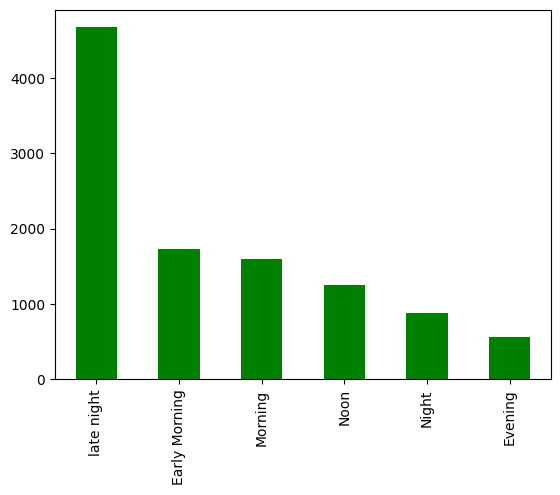

In [27]:
train_data['Duration_hours'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

### Applying pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> We have to tell our ML Model that this is hour & this is minute for each of the row ..

In [28]:
train_data.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


In [29]:
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'O'] # Categorical Columns
cat_cols

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [30]:
cont_cols = [col for col in train_data.columns if train_data[col].dtype != 'O'] # Continuous Columns
cont_cols

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_hours',
 'Duration_mins']

### Correlation Matrix Heatmap

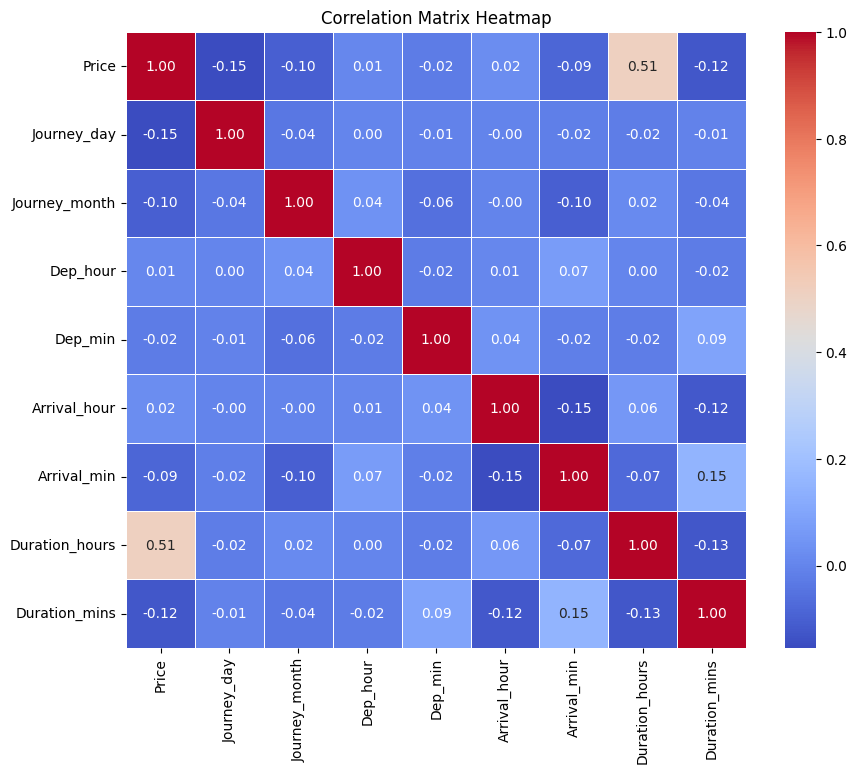

In [31]:
selected_columns = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info','Price','Journey_day','Journey_month','Dep_hour','Dep_min',
                    'Arrival_hour','Arrival_min','Duration_hours','Duration_mins']

# Subset the DataFrame with selected columns
selected_df = train_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## FEATURE ENCODING


   #### Nominal data --> data are not in any order --> OneHotEncoder is used in this case
   #### Ordinal data --> data are in order --> LabelEncoder is used in this case

In [32]:
categorical = train_data[cat_cols]
categorical.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info


In [33]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

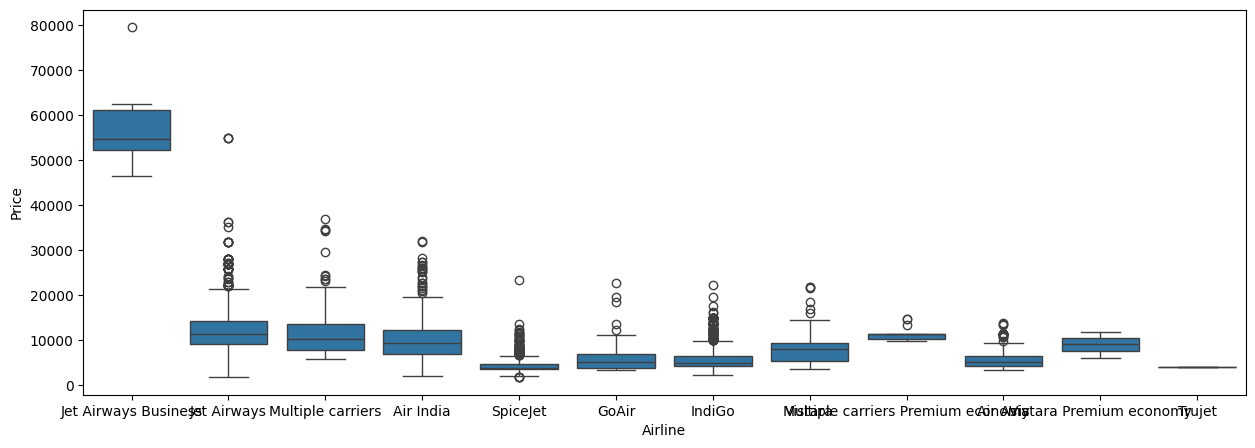

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline' , y='Price' , data=train_data.sort_values('Price' , ascending=False))

It proves Jet Airways has the highest Price whereas All other Airlines have almost similar Prices

<Axes: xlabel='Total_Stops', ylabel='Price'>

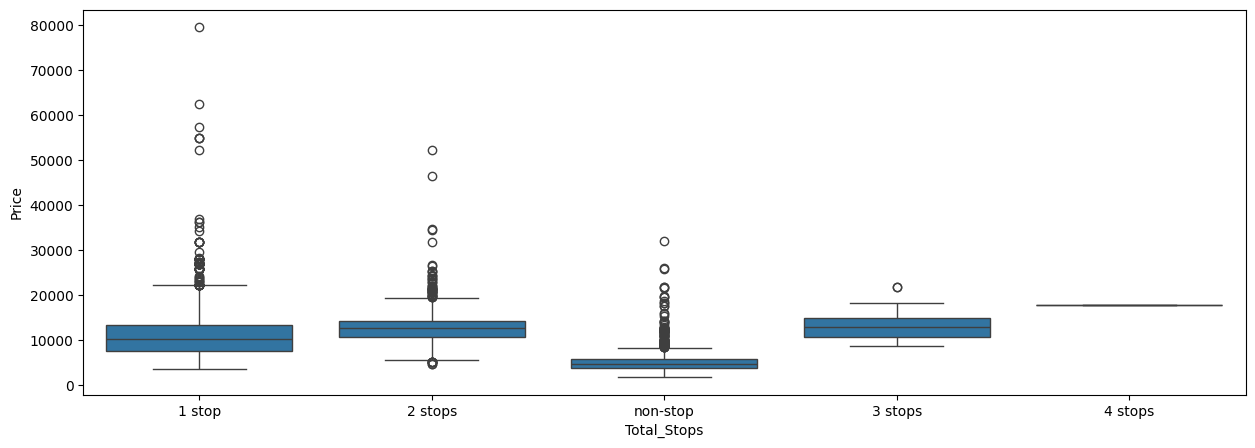

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops' , y='Price' , data=train_data.sort_values('Price' , ascending=False))

In [36]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

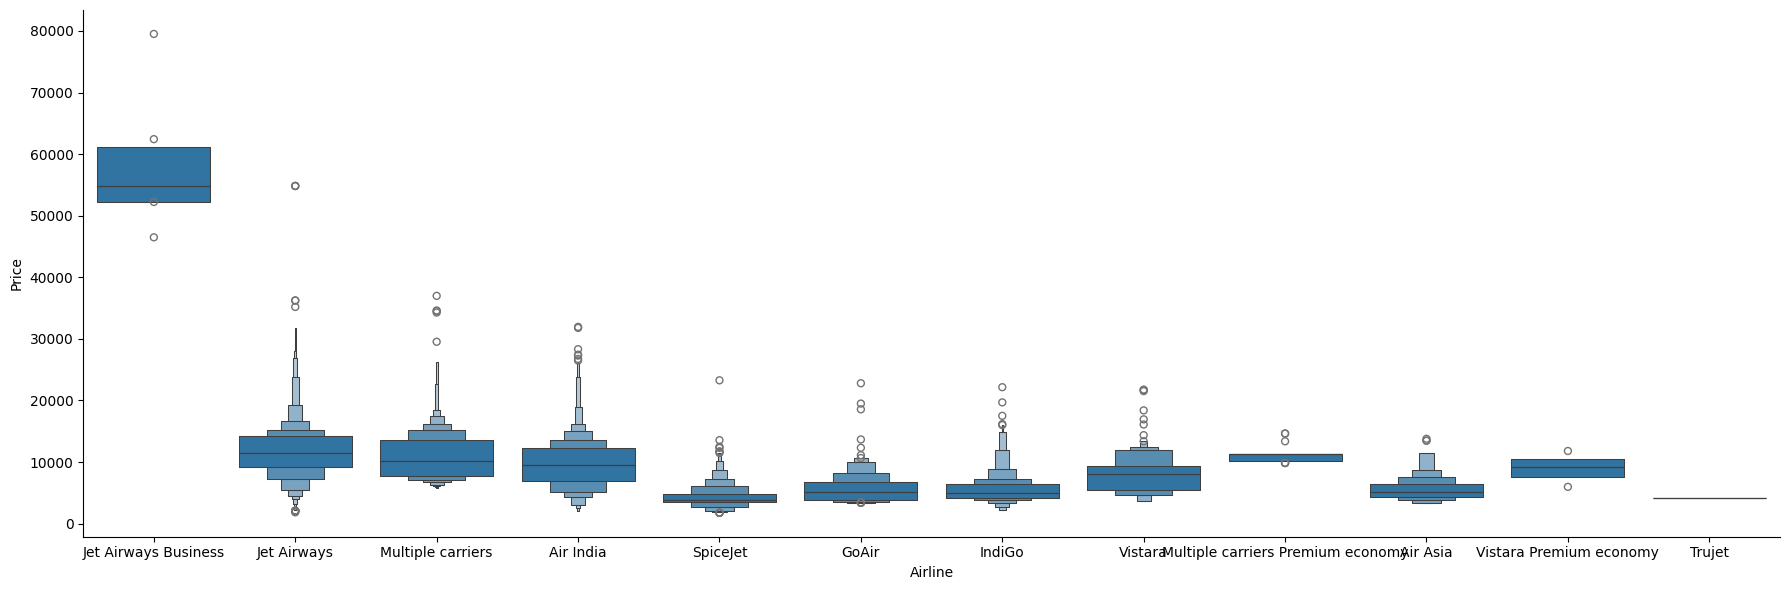

In [37]:


# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()



### Applying One-HotEncoding on data..

In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)
Airline = Airline.astype(int)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [39]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

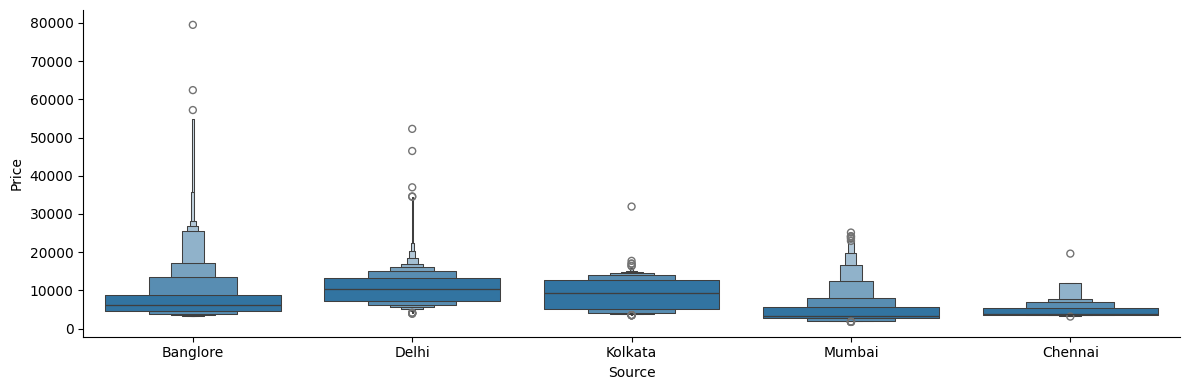

In [40]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), 
            kind="boxen", height = 4, aspect = 3)
plt.show()

In [41]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)
Source = Source.astype(int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [42]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [43]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)
Destination = Destination.astype(int)
Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [44]:
train_data.head()
# train_data["Route"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [45]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

### Dropping Unnecessary Columns

In [46]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [47]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### Applying LabelEncoding on data..

In [48]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, 
                   inplace = True)

In [49]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [50]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [51]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


### Dropping Redundent Columns

In [52]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [53]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [54]:
data_train.shape

(10682, 30)

In [55]:
train_data.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [56]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [57]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
dtype: int64

### Total Categorical Data

In [58]:
for i in train_data.columns:
    print('{} has total {} categories'.format(i,len(train_data[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Price has total 1870 categories
Journey_day has total 10 categories
Journey_month has total 4 categories
Dep_hour has total 24 categories
Dep_min has total 12 categories
Arrival_hour has total 24 categories
Arrival_min has total 12 categories
Duration_hours has total 44 categories
Duration_mins has total 12 categories


USING LABEL ENCODING

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
encoder = LabelEncoder()

In [61]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [62]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


#### Lets Perform outlier detection !


In [63]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.histplot(df[col],ax=ax1) # Distribution plot
    sns.boxplot(df[col],ax=ax2) # Box plot
    

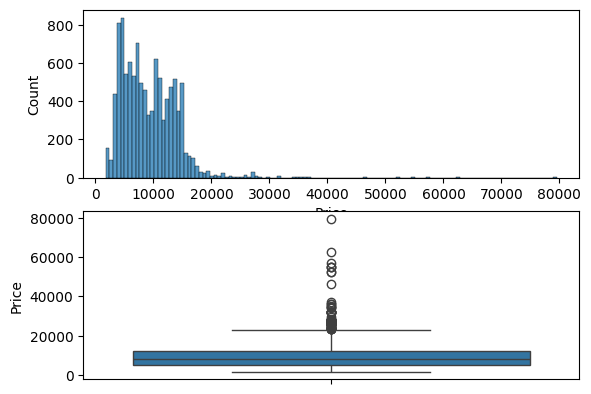

In [64]:
plot(train_data , 'Price')

### Dealing with Outliers

In [65]:
# if prices greater than 35000 then they will be a outlier and replace them with median

In [66]:
train_data['Price']= np.where(train_data['Price'] > 35000, 
                              train_data['Price'].median(), train_data['Price'])

In [116]:
a = train_data['Price'] = len((train_data['Price'] > 3500))
a

10682

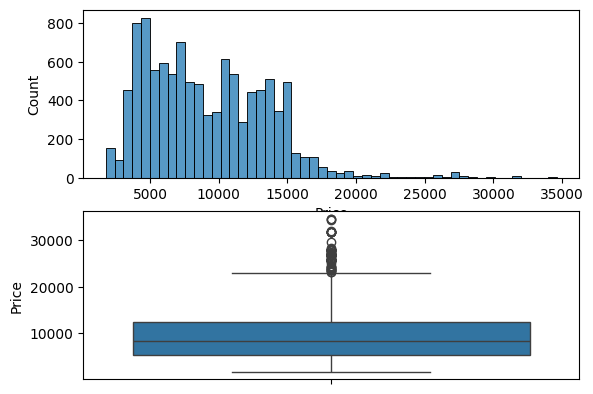

In [67]:
plot(train_data , 'Price')

#### PERFORMING FEATURE SELECTION
###### Feature Selection: 
    Finding out the best feature which will contribute and 
    have good relation with target variable.
    It is used here To select important features OR to get rid 
    of curse of dimensionality OR to get rid of duplicate features

In [68]:
from sklearn.feature_selection import mutual_info_regression

In [69]:
train_data = train_data.fillna(0)


In [70]:
data_train.shape

(10682, 30)

In [71]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [72]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# X = train_data.drop(['Price'] , axis=1)
# X.head()

In [74]:
# y = data_train.iloc[:, 1]
y = train_data['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [75]:
print(X.dtypes)


Total_Stops                                  int64
Journey_day                                  int64
Journey_month                                int64
Dep_hour                                     int64
Dep_min                                      int64
Arrival_hour                                 int64
Arrival_min                                  int64
Duration_hours                               int64
Duration_mins                                int64
Airline_Air India                            int64
Airline_GoAir                                int64
Airline_IndiGo                               int64
Airline_Jet Airways                          int64
Airline_Jet Airways Business                 int64
Airline_Multiple carriers                    int64
Airline_Multiple carriers Premium economy    int64
Airline_SpiceJet                             int64
Airline_Trujet                               int64
Airline_Vistara                              int64
Airline_Vistara Premium economy

In [76]:
print(y.dtypes)

float64


In [77]:
imp = mutual_info_regression(X , y)

### Estimate mutual information for a continuous target variable.

##### Mutual information between two random variables is a non-negative value, which measures the dependency between the variables.
##### If It is equal to zero it means two random variables are independent, and higher values mean higher dependency.



In [78]:
imp

array([0.78604156, 0.22526572, 0.6211287 , 0.34567608, 0.25586438,
       0.39983478, 0.34533871, 0.47690482, 0.34403866, 0.30526717,
       0.04863902, 0.34405433, 0.54178338, 0.        , 0.26728902,
       0.01155281, 0.19224134, 0.01073454, 0.14144479, 0.        ,
       0.13313107, 0.52385511, 0.4493708 , 0.20432994, 0.52155441,
       0.3264188 , 0.19294016, 0.12776302, 0.17383916])

In [79]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [80]:
imp_df.columns = ['importance']

In [81]:
imp_df

,importance
Total_Stops,0.786042
Journey_day,0.225266
Journey_month,0.621129
Dep_hour,0.345676
Dep_min,0.255864
Arrival_hour,0.399835
Arrival_min,0.345339
Duration_hours,0.476905
Duration_mins,0.344039
Airline_Air India,0.305267


In [82]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Total_Stops,0.786042
Journey_month,0.621129
Airline_Jet Airways,0.541783
Source_Delhi,0.523855
Destination_Cochin,0.521554
Duration_hours,0.476905
Source_Kolkata,0.449371
Arrival_hour,0.399835
Dep_hour,0.345676
Arrival_min,0.345339


## Building the ML model

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

### Creating a function predict() for predicting the accuracy and various scores of the model

In [85]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train, y_train)  # fitting the model
    print('Training score : {}'.format(model.score(X_train, y_train)))  # training score
    y_pred = model.predict(X_test)
    print('Predictions are : {}'.format(y_pred))  # prints the predicted values on the test data.
    print('\n')
    
    r2_score = model.score(X_test, y_test)  # corrected to calculate R2 score on the test data
    print('R2 score is : {}'.format(r2_score))  # prints the R2 score on the test data.
  
    print('MAE :', metrics.mean_absolute_error(y_test, y_pred))  
    # MAE is the sum of absolute differences between our target and predicted variables.
    print('MSE :', metrics.mean_squared_error(y_test, y_pred))  
    # MSE is the sum of squared differences between our target and predicted variables.
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
    # RMSE is the square root of the mean of the squared differences between our target and predicted variables.
    
    sns.displot(y_test - y_pred)
    plt.show()
    
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()


#### Fitting model using Linear Regression ALGO


In [86]:
from sklearn.linear_model import LinearRegression

Training score : 0.6176139166535501
Predictions are : [13314.91684409  7530.19897681  9556.04503224 ...  2602.05084375
  9636.71968685  7617.36955186]


R2 score is : 0.6038361269079064
MAE : 1933.6262919559526
MSE : 7712359.683263149
RMSE : 2777.113552461107


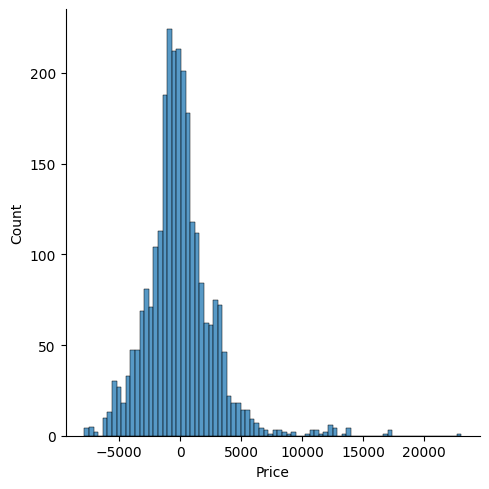

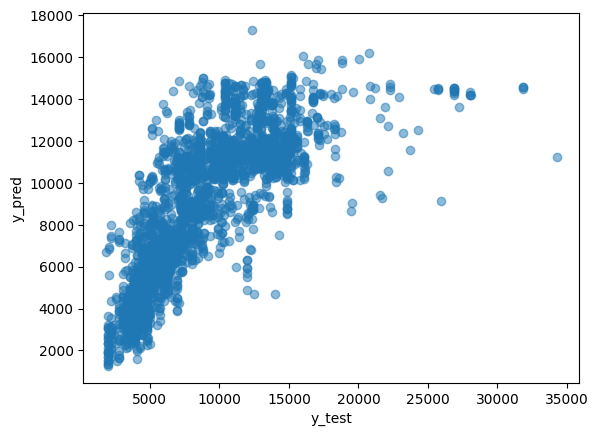

In [87]:
predict(LinearRegression())

#### Fitting model using Random Forest ALGO


In [88]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9513017341133191
Predictions are : [16853.79  5402.52  8923.84 ...  3505.92  6254.71  6908.4 ]


R2 score is : 0.8202177331371654
MAE : 1150.7818094473644
MSE : 3499929.1982291923
RMSE : 1870.8097707220775


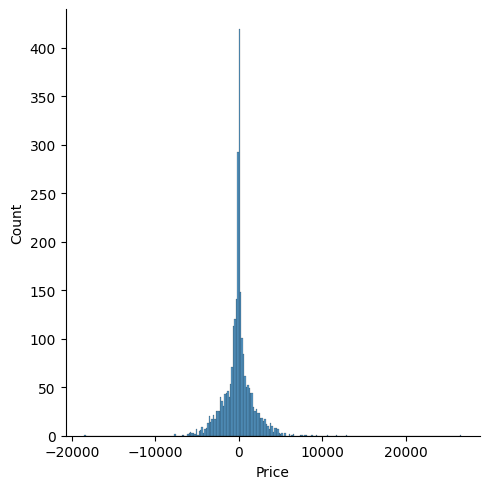

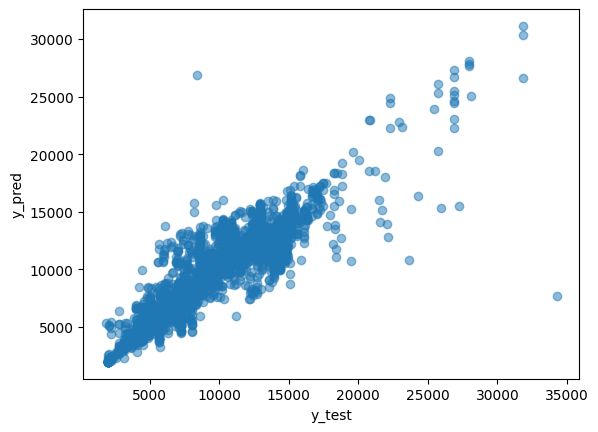

In [89]:
predict(RandomForestRegressor())

#### Fitting model using K-Nearest Neighbors(KNN) ALGO


In [90]:
from sklearn.neighbors import KNeighborsRegressor

Training score : 0.7502788150681083
Predictions are : [16315.   5158.2  8536.  ...  4125.6 11656.4  8376.6]


R2 score is : 0.5898377102016936
MAE : 1841.7461624859602
MSE : 7984875.255649569
RMSE : 2825.752157505957


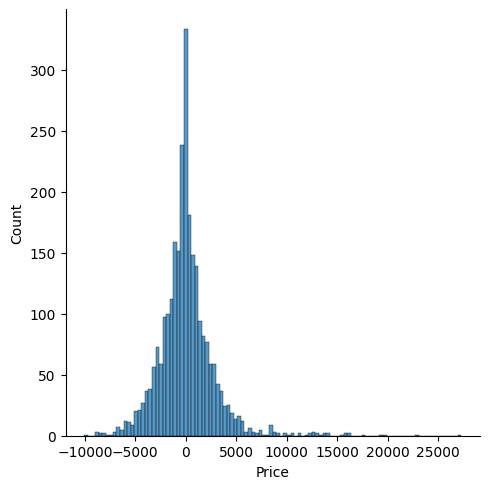

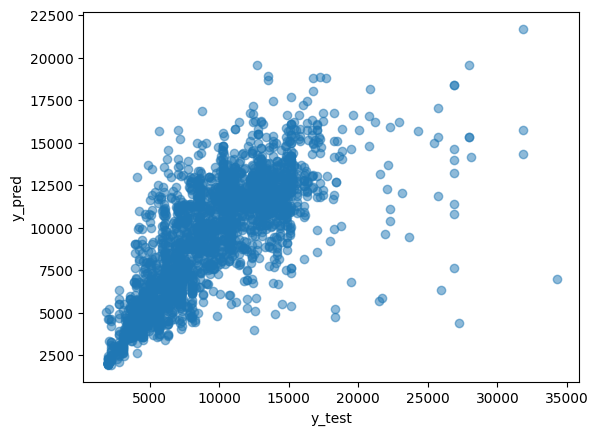

In [91]:
predict(KNeighborsRegressor())

#### Fitting model using DECISION TREE ALGO


In [92]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
Predictions are : [16840.  4959.  8452. ...  3419.  5797.  6818.]


R2 score is : 0.7168133566878838
MAE : 1365.5944090852365
MSE : 5512964.202597238
RMSE : 2347.970230347318


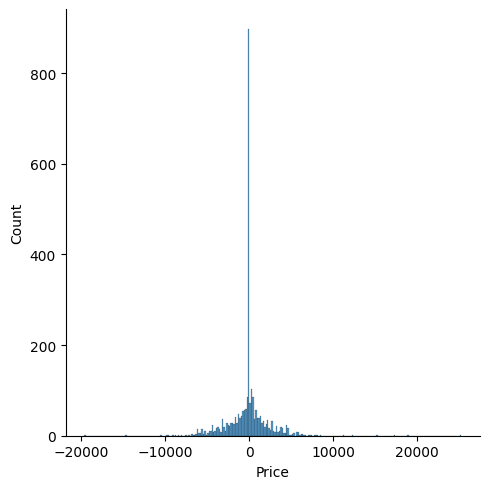

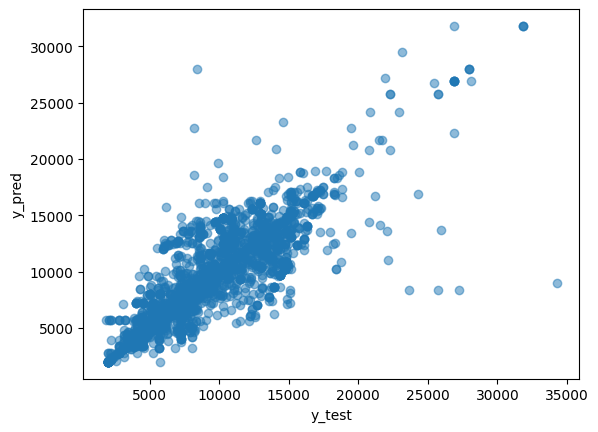

In [93]:
predict(DecisionTreeRegressor())

### PERFORMANCE COMPARISON OF THE ABOVE ML MODELS

In [94]:
LinearRegression = LinearRegression()
RandomForestRegressor = RandomForestRegressor()
KNeighborsRegressor = KNeighborsRegressor()
DecisionTreeRegressor = DecisionTreeRegressor()


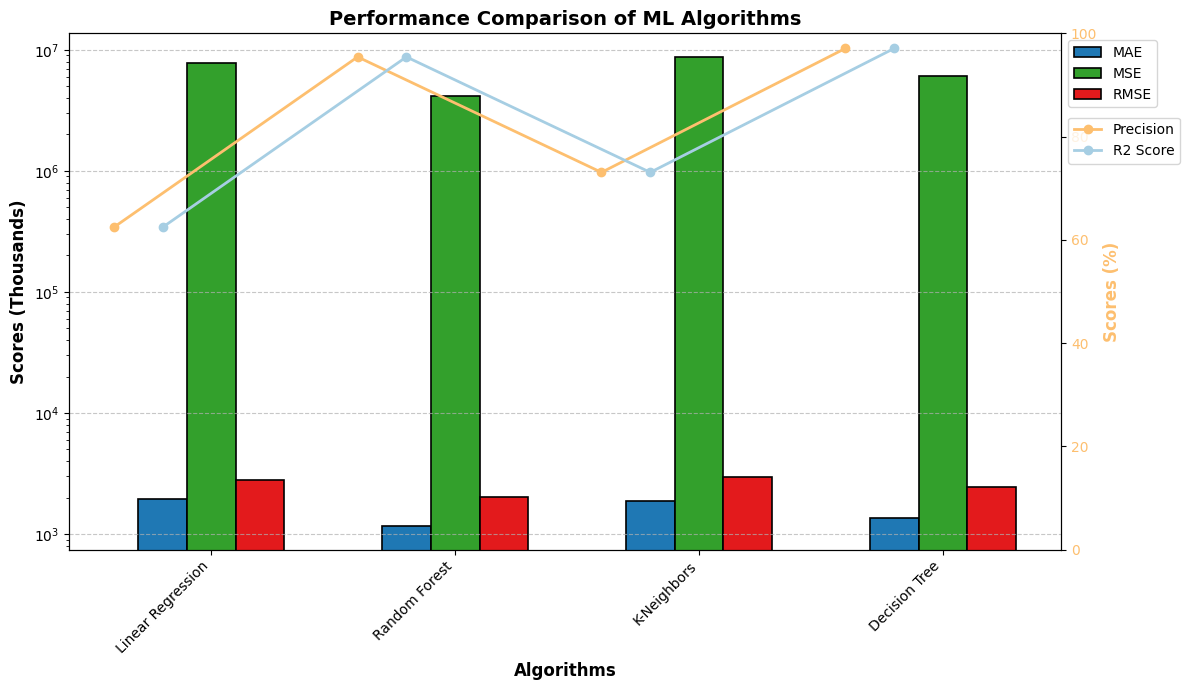

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Your data
accuracy_scores = [0.6241794859094292, 0.9543104572465809, 0.7306851009410837, 0.9707490055980877]
r2_scores = [0.6241794859094292, 0.9543104572465809, 0.7306851009410837, 0.9707490055980877]
mae_scores = [1949.458356115105, 1163.7422094714325, 1873.2053912392364, 1361.270185947835]
mse_scores = [7835152.949901845, 4144050.3137799203, 8751130.411591165, 6020463.490129997]
rmse_scores = [2799.1343215183233, 2035.694061930702, 2958.2309598121587, 2453.6632796962986]

# List of algorithms
algorithms = ['Linear Regression', 'Random Forest', 'K-Neighbors', 'Decision Tree']

# Set the position of each bar on X-axis
r = np.arange(len(algorithms))

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 7))

# Create bar plot for MAE, MSE, and RMSE on the primary y-axis
bar_width = 0.2
ax1.bar(r - bar_width, mae_scores, width=bar_width, label='MAE', color='#1f78b4', edgecolor='black', linewidth=1.2)
ax1.bar(r, mse_scores, width=bar_width, label='MSE', color='#33a02c', edgecolor='black', linewidth=1.2)
ax1.bar(r + bar_width, rmse_scores, width=bar_width, label='RMSE', color='#e31a1c', edgecolor='black', linewidth=1.2)

# Set labels and ticks for the primary y-axis
ax1.set_xlabel('Algorithms', fontweight='bold', fontsize=12)
ax1.set_ylabel('Scores (Thousands)', fontweight='bold', fontsize=12)
ax1.set_xticks(r)
ax1.set_xticklabels(algorithms, rotation=45, ha='right', fontsize=10)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Create a secondary y-axis for accuracy and R2 scores
ax2 = ax1.twinx()
line_accuracy, = ax2.plot(r - 2 * bar_width, np.array(accuracy_scores) * 100, marker='o', label='Precision', color='#fdbf6f', linewidth=2)
line_r2, = ax2.plot(r - bar_width, np.array(r2_scores) * 100, marker='o', label='R2 Score', color='#a6cee3', linewidth=2)

# Set labels and ticks for the secondary y-axis
ax2.set_ylabel('Scores (%)', fontweight='bold', color='#fdbf6f', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#fdbf6f')
ax2.set_ylim(0, 100)  # Assuming percentage scores are in the range [0, 1]

# Set logarithmic scale for the primary y-axis
ax1.set_yscale('log')

# Title
plt.title('Performance Comparison of ML Algorithms', fontweight='bold', fontsize=14)

# Adding a grid for better readability
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add legends for the lines
ax2.legend(handles=[line_accuracy, line_r2], loc='upper left', bbox_to_anchor=(1, 0.85), fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [96]:
from sklearn.svm import SVR

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [99]:
svm_model = SVR(kernel='linear')  # You can choose different kernels like'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


Training score : 0.43631373856126154
Predictions are : [9329.98349608 8534.1140181  8517.73937398 ... 5802.77357558 5276.63619068
 8511.20530748]


R2 score is : 0.43880450029659346
MAE : 2236.364612026613
MSE : 10912747.231881676
RMSE : 3303.44475235801


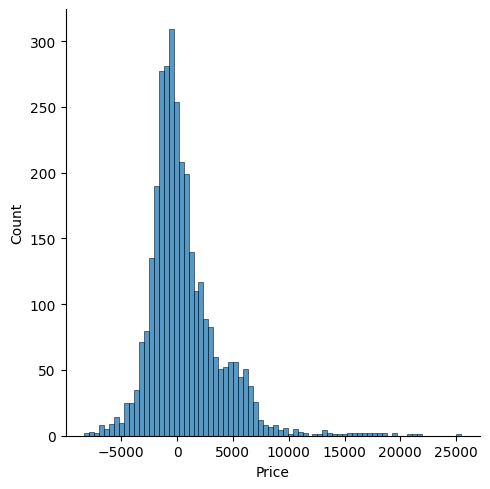

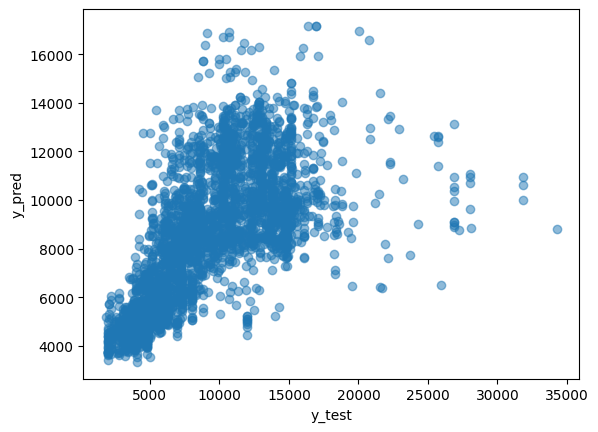

In [100]:
predict(svm_model)


SAVING THE MODEL USING PICKLE

In [101]:
RandomForestRegressor.fit(X_train , y_train)

RandomForestRegressor()

In [102]:
y_pred = RandomForestRegressor.predict(X_test)

In [103]:
y_pred

array([16753.79 ,  5466.43 ,  8801.12 , ...,  5867.924,  3386.55 ,
        7062.38 ])

In [104]:
import pickle

In [105]:
file = open(r'/home/matrix/5TH SEM/DATA SCIENCE FUNDAMENTALS- UCS538/Flight Price Predictor Model/rf_random.pkl' , 'wb')

In [106]:
pickle.dump(RandomForestRegressor,file)

In [107]:
model = open(r'/home/matrix/5TH SEM/DATA SCIENCE FUNDAMENTALS- UCS538/Flight Price Predictor Model/rf_random.pkl' , 'rb')

In [108]:
forest = pickle.load(model)

In [109]:
y_pred2 = forest.predict(X_test)

In [110]:
file_path = '/home/matrix/5TH SEM/DATA SCIENCE FUNDAMENTALS- UCS538/Flight Price Predictor Model/rf_random.pkl'

In [111]:
try:
    with open(file_path, 'rb') as file:
        # Load the pickled data from the file
        loaded_data = pickle.load(file)

    # Display or print the loaded data
    print("Contents of the pickle file:")
    print(loaded_data)
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")

except Exception as e:
    print(f"Error: {e}")

Contents of the pickle file:
RandomForestRegressor()
